In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import sys
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0])) #shape[0]- row
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수: 10000 개


In [3]:
print(X_train.shape) # 이미지가 28X28

(60000, 28, 28)


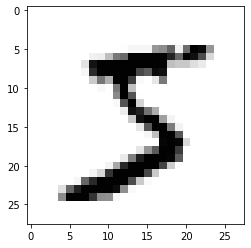

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [6]:
X_train = X_train.reshape(X_train.shape[0], -1) # 60000, 784로 2차원배열
X_train = X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [7]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
print("target : %d " % (y_train[0]))

target : 5 


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
import os
model.compile(loss='categorical_crossentropy', \
             optimizer='adam',\
             metrics=['accuracy'])

MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath,\
                            monitor='val_loss',\
                            verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',\
                                       patience=10)

In [14]:
history = model.fit(X_train, y_train, validation_data=\
                   (X_test, y_test), epochs=30, batch_size=200,\
                    verbose=0, \
                    callbacks=[early_stopping_callback,\
                               checkpoint])


Epoch 00001: val_loss improved from inf to 0.15416, saving model to ./model\01-0.1542.hdf5

Epoch 00002: val_loss improved from 0.15416 to 0.10618, saving model to ./model\02-0.1062.hdf5

Epoch 00003: val_loss improved from 0.10618 to 0.08728, saving model to ./model\03-0.0873.hdf5

Epoch 00004: val_loss improved from 0.08728 to 0.07420, saving model to ./model\04-0.0742.hdf5

Epoch 00005: val_loss improved from 0.07420 to 0.07191, saving model to ./model\05-0.0719.hdf5

Epoch 00006: val_loss improved from 0.07191 to 0.06186, saving model to ./model\06-0.0619.hdf5

Epoch 00007: val_loss did not improve from 0.06186

Epoch 00008: val_loss improved from 0.06186 to 0.05936, saving model to ./model\08-0.0594.hdf5

Epoch 00009: val_loss did not improve from 0.05936

Epoch 00010: val_loss did not improve from 0.05936

Epoch 00011: val_loss did not improve from 0.05936

Epoch 00012: val_loss did not improve from 0.05936

Epoch 00013: val_loss did not improve from 0.05936

Epoch 00014: val_lo

In [15]:
print("\n Test Accuracy: %.4f" % \
     (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0837 - accuracy: 0.9770

 Test Accuracy: 0.9770


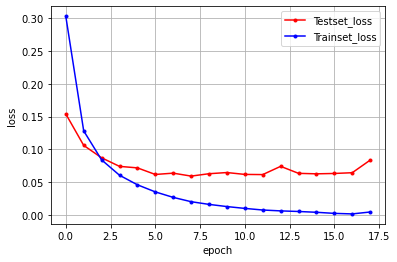

In [18]:
y_vloss = history.history['val_loss'] # test
y_loss = history.history['loss'] # train

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', \
        label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', \
        label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()